In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7E74-9929

 Directory of C:\Users\hp\Documents\Flatiron\dsc-phase-1-project\zippedData

10/31/2023  07:59 PM    <DIR>          .
10/31/2023  07:59 PM    <DIR>          ..
10/31/2023  07:59 PM    <DIR>          .ipynb_checkpoints
10/27/2023  01:25 PM            53,544 bom.movie_gross.csv.gz
10/27/2023  01:25 PM        18,070,960 imdb.name.basics.csv.gz
10/27/2023  01:25 PM         5,599,979 imdb.title.akas.csv.gz
10/27/2023  01:25 PM         3,459,897 imdb.title.basics.csv.gz
10/27/2023  01:25 PM         1,898,523 imdb.title.crew.csv.gz
10/27/2023  01:25 PM        12,287,583 imdb.title.principals.csv.gz
10/27/2023  01:25 PM           539,530 imdb.title.ratings.csv.gz
10/27/2023  01:25 PM           498,202 rt.movie_info.tsv.gz
10/27/2023  01:25 PM         3,402,194 rt.reviews.tsv.gz
10/27/2023  01:25 PM           827,840 tmdb.movies.csv.gz
10/27/2023  01:25 PM           153,218 tn.movie_budgets.csv.gz
10/31/2023  07:59 PM         

In [1]:
import pandas as pd
titlebasics = pd.read_csv("imdb.title.basics.csv.gz")
titlebasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [2]:
# We check if there are any repeated data in tconst and the results shows all are unique
titlebasics['tconst'].describe()

count        146144
unique       146144
top       tt0063540
freq              1
Name: tconst, dtype: object

In [3]:
# checking for null values to determine whether to fill or drop them if they have no significant effect on our data
titlebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
# checking the total number of null in our data and runtime_minutes has the highest which
# i advice to drop them as it has no significant impact in our analysis and it would take a great amount of time trying to fill them
titlebasics.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [5]:
# dropping runtime_minutes as they have a lot of null
titlebasics.drop('runtime_minutes', axis = 1, inplace = True) 

In [6]:
# drop the rows which genres are null as its percentage to the total data is minimal 
titlebasics.dropna(axis = 0, subset=['genres'], inplace=True)

In [7]:
# this is the shape of the cleaned data
titlebasics.shape

(140736, 5)

In [8]:
# first five details of our data
titlebasics.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [9]:
import pandas as pd
titleratings = pd.read_csv("imdb.title.ratings.csv.gz")
titleratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [10]:
# getting to know if the tconst has unique values
titleratings['tconst'].describe()

count          73856
unique         73856
top       tt10356526
freq               1
Name: tconst, dtype: object

In [11]:
# cheching on the information of our data and the results show the data has no nulls and its ready for analysis
titleratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
# I combined the title ratings and title basics to give me a broader view of the analysis,
# i used the tconst to merge the two as its the column which has similar values in both data sets
movies  = pd.merge(titlebasics, 
                              titleratings, 
                              on=['tconst'], 
                              how='left')
movies

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War",NaN,NaN
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,NaN,NaN
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,NaN,NaN
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy,NaN,NaN


In [13]:
#the merged data set movies will have nulls as the title basics has 140736 rows and
# title ratings has 73856 which could mean some movies had no ratings
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140736 entries, 0 to 140735
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          140736 non-null  object 
 1   primary_title   140735 non-null  object 
 2   original_title  140733 non-null  object 
 3   start_year      140736 non-null  int64  
 4   genres          140736 non-null  object 
 5   averagerating   73052 non-null   float64
 6   numvotes        73052 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.5+ MB


In [14]:
# drop the rows with null values in average rating and numvotes
movies.dropna(axis = 0, subset=['numvotes'], inplace=True)

In [15]:
# drop the original_title as its contents are the same as that of primary_title
movies.drop('original_title', axis = 1, inplace = True)

In [16]:
# checking if we still have non-null values the results shows our data is clean to work with
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 140727
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   primary_title  73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
 5   numvotes       73052 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [17]:
# highlight a sample of the data set to use on the analysis
movies.sample(5)

,tconst,primary_title,start_year,genres,averagerating,numvotes
83747,tt4976628,Fool Moon,2016,"Comedy,Drama",5.3,62.0
49593,tt3018596,Nietzermann,2015,"Documentary,Mystery,Thriller",7.4,42.0
34401,tt2303278,Baseball Chronicles,2010,Documentary,5.3,13.0
5688,tt1262958,A Small Act,2010,Documentary,7.5,297.0
68788,tt4030502,"Sorria, Você Está Sendo Filmado",2014,Comedy,5.1,77.0


In [66]:
# in the above value count we have a length of 923 genre types and this is because different genres have been combined thus
# Split the genres column and create a list of genres for each movie
movies['genres'] = movies['genres'].str.split(',')

# Create a list of all genres in the dataset
all_genres = [genre for genres in movies['genres'] for genre in genres]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the genre counts
print("Genre Counts:")
print(genre_counts)
# the drama genre is still leading type of movie followed by drama,documentary and comedy

Genre Counts:
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64


In [18]:
# Getting the shape of the cleaned movie data set
movies.shape

(73052, 6)

In [19]:
# getting the frequency of each rating the results show most movies had a rating of 7
movies['averagerating'].value_counts()

averagerating
7.0     2229
6.6     2221
7.2     2217
6.8     2216
6.5     2205
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: count, Length: 91, dtype: int64

In [20]:
# confirming the frequency above to see if it equals the mode and it does 7 was the most rating given
movies['averagerating'].mode()

0    7.0
Name: averagerating, dtype: float64

In [61]:
# Summary statistics of averagerating
movies['averagerating'].describe()

count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [21]:
#in the movies dataset the data hasnt been well arranged therefore i will create another dataframe that has movies listed from the one with the highest numvotes 
# Sort the DataFrame by 'numvotes' in descending order
sorted_movies = movies.sort_values(by='numvotes', ascending=False)

# This data set shows the highest number of votes to the least and from obervation it 
# looks that there is no relation between numvotes and average rating beacuse the bodyfarm had 
# a rating of 9 which is higher than inception 8.8 but managed to get only five votes
movies_sorted_highest_numvotes = sorted_movies
movies_sorted_highest_numvotes
# create a data set that has movies with numvotes above 500k to have a conclusive analysis 

,tconst,primary_title,start_year,genres,averagerating,numvotes
6537,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0
6371,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769.0
305,tt0816692,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334.0
19598,tt1853728,Django Unchained,2012,"Drama,Western",8.4,1211405.0
350,tt0848228,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...
57250,tt3417906,The Nose,2013,Documentary,8.6,5.0
91339,tt5465608,Extramaterial,2016,Documentary,6.6,5.0
79343,tt4681636,Free Spaces,2015,Documentary,9.0,5.0
47655,tt2915328,Abou Al Oureef,2014,Comedy,5.2,5.0


In [22]:
# Filter my DataFrame to retain only movies with numvotes greater than 500k 
movies_filtered = movies_sorted_highest_numvotes[movies_sorted_highest_numvotes['numvotes'] > 500000]

# Sort the filtered DataFrame by numvotes in descending order
movies_filtered_sorted = movies_filtered.sort_values(by='numvotes', ascending=False)
movies_filtered_sorted

# Now, df_filtered_sorted contains movies with numvotes > 500k, sorted by numvotes in descending order
# "Inception" stands out as the highest-rated movie with a rating of 8.8 and the most votes (1,841,066). 
# It is an example of a movie that combines the "Action," "Adventure," and "Sci-Fi" genres, which have broad audience appeal.


,tconst,primary_title,start_year,genres,averagerating,numvotes
6537,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0
6371,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769.0
305,tt0816692,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334.0
19598,tt1853728,Django Unchained,2012,"Drama,Western",8.4,1211405.0
350,tt0848228,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...
18339,tt1825683,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
41265,tt2543164,Arrival,2016,"Drama,Mystery,Sci-Fi",7.9,515483.0
5375,tt1211837,Doctor Strange,2016,"Action,Adventure,Fantasy",7.5,514510.0
184,tt0478970,Ant-Man,2015,"Action,Adventure,Comedy",7.3,501213.0


In [23]:
movies_filtered_sorted.describe()
# The genres is an object type and does not work with the describe function
# The data set has a count of 67 rows which shows in the results for start_year,averagerating,numvotes
# MEAN:this gives the average value,start_year =2013,averagerating =7.7,numvotes =683,853
# STD:standard deviation is the measure of spread from the mean meaning in start_year =2 thus the realse years vary by2,averagerating has low std of 0.5
# MIN:this shows the least value in the column,start_year shows the earliest movie was released in 2010,averagerating lowestrating is 6,minimum numvotes =500,595
# MAX:this shows the highest value in the column,start_year latest movie was released in 2018,maximum averagerating =8.8,numvotes =1,841,066.

,start_year,averagerating,numvotes
count,67.000000,67.000000,6.700000e+01
mean,2013.149254,7.728358,6.838535e+05
std,2.024499,0.540988,2.389190e+05
min,2010.000000,6.000000,5.005950e+05
25%,2012.000000,7.300000,5.401670e+05
50%,2013.000000,7.800000,6.169160e+05
75%,2014.500000,8.100000,6.875495e+05
max,2018.000000,8.800000,1.841066e+06


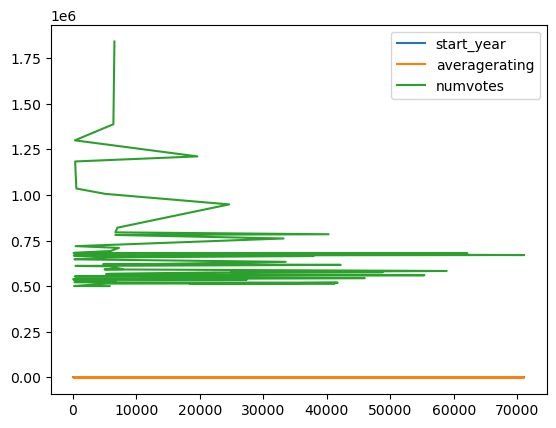

In [25]:
movies_filtered_sorted.plot();

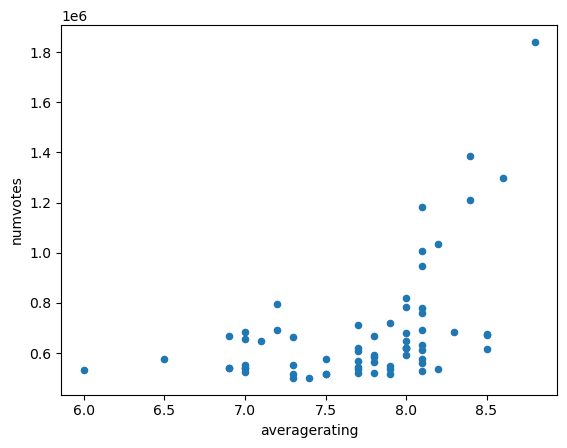

In [26]:
# Create a scatter plot to explore the relationship between ratings and the number of votes. This can help you understand if there is a correlation between these two variables
movies_filtered_sorted.plot('averagerating', 'numvotes', kind='scatter');

In [29]:
allgenres = movies_filtered_sorted['genres'].value_counts()
allgenres

genres
Action,Adventure,Sci-Fi       18
Action,Adventure,Fantasy       6
Action,Adventure,Comedy        4
Adventure,Animation,Comedy     3
Biography,Drama,History        2
Adventure,Drama,Fantasy        2
Biography,Drama,Thriller       2
Adventure,Drama,Sci-Fi         2
Action,Adventure,Thriller      1
Drama,Mystery,Sci-Fi           1
Comedy,Drama                   1
Crime,Drama                    1
Crime,Drama,Mystery            1
Comedy,Fantasy                 1
Adventure,Mystery,Sci-Fi       1
Action,Sci-Fi                  1
Crime,Mystery,Thriller         1
Action,Adventure,Horror        1
Action,Drama,Sci-Fi            1
Adventure,Fantasy              1
Biography,Drama                1
Mystery,Thriller               1
Drama,Mystery,Thriller         1
Action,Adventure,Animation     1
Drama,Music                    1
Action,Thriller                1
Comedy,Drama,Romance           1
Action,Adventure,Biography     1
Adventure,Comedy,Crime         1
Drama,Thriller                 1
Bio

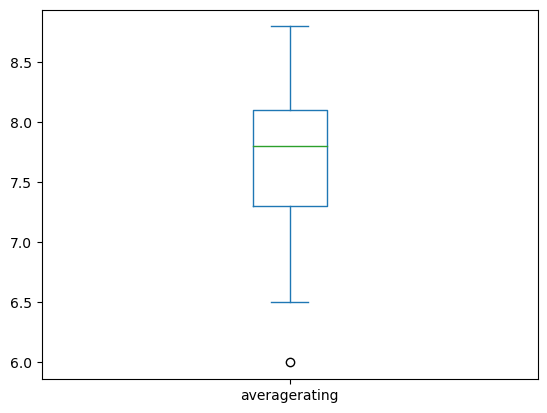

In [37]:
# box plot using genere and rating
movies_filtered_sorted.plot('genres', 'averagerating', kind='box');

Analysis

Bar Chart for Yearly Movie Counts:

Create a bar chart to visualize the number of movies released each year. This can help you understand the distribution of movies over time.


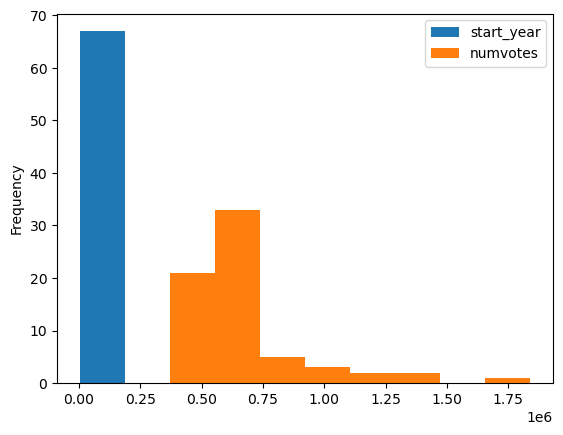

In [40]:
# movies_filtered_sorted.plot.hist('');
# kind='scatter');
movies_filtered_sorted.plot('averagerating', kind='hist');

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Count the number of movies per year
yearly_movie_counts = movies_filtered_sorted['start_year'].value_counts().sort_index()


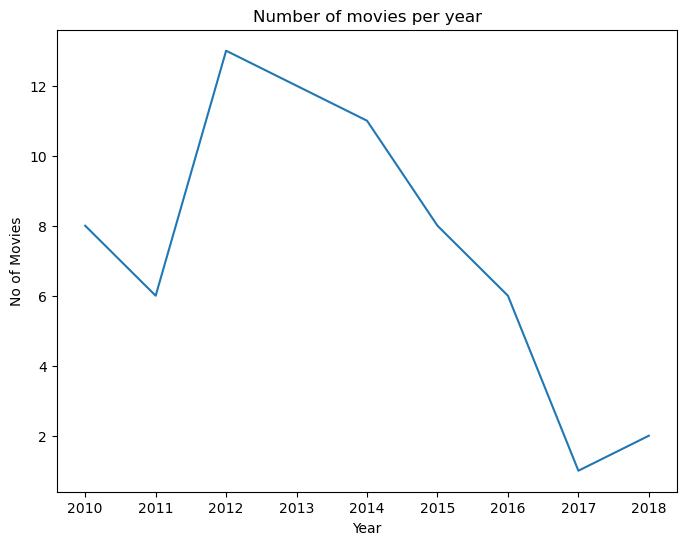

In [45]:
plt.figure(figsize=(8,6))

plt.plot(yearly_movie_counts.index, yearly_movie_counts.values,)

plt.xlabel('Year')
plt.ylabel('No of Movies')

plt.title('Number of movies per year')

plt.show()

In [58]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_movies['averagerating'], filtered_movies['numvotes'],)
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Scatter Plot: Average Rating vs. Number of Votes')
plt.grid(True)

TypeError: 'module' object is not callable

In [71]:
movies.shape

(73052, 6)

In [76]:
# Example of filtering data using Pandas
filtered_movies = movies[movies['averagerating'] >= 5,[movies['numvotes'] >]  

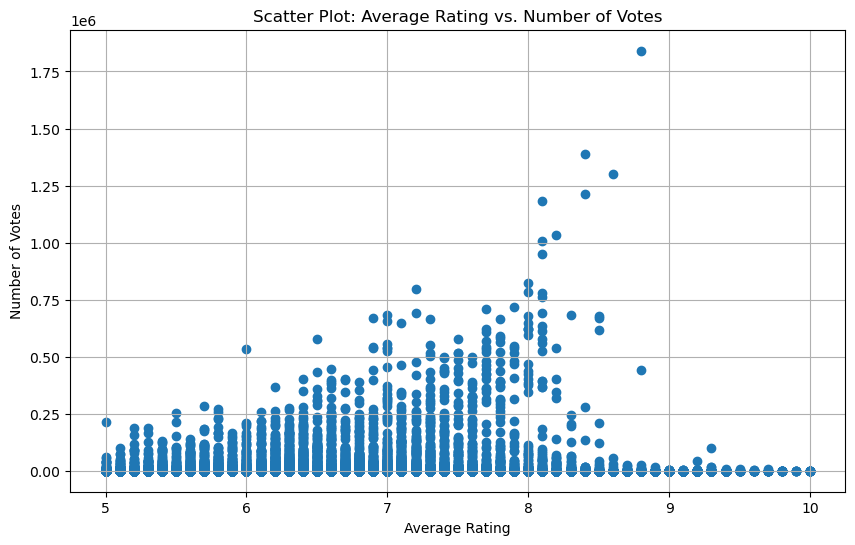

In [79]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_movies['averagerating'], filtered_movies['numvotes'],)
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Scatter Plot: Average Rating vs. Number of Votes')
plt.grid(True)

In [109]:
import pandas as pd
moviegross = pd.read_csv("bom.movie_gross.csv.gz")
moviegross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [115]:
combined_data = pd.merge(movies, moviegross, left_on="primary_title", right_on="title", how="right")
combined_data

,tconst,primary_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,2010.0,"Adventure,Animation,Comedy",8.3,682218.0,Toy Story 3,BV,415000000.0,652000000,2010
1,NaN,NaN,NaN,NaN,NaN,NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,NaN,NaN,NaN,NaN,NaN,NaN,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,tt1375666,Inception,2010.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Inception,WB,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,2010.0,"Adventure,Animation,Comedy",6.3,167532.0,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...,...,...,...,...,...
4102,tt6523720,The Quake,2018.0,"Action,Drama,Thriller",6.2,5270.0,The Quake,Magn.,6200.0,NaN,2018
4103,NaN,NaN,NaN,NaN,NaN,NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018
4104,NaN,NaN,NaN,NaN,NaN,NaN,El Pacto,Sony,2500.0,NaN,2018
4105,NaN,NaN,NaN,NaN,NaN,NaN,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [43]:
moviegross['title'].describe()

count          3387
unique         3386
top       Bluebeard
freq              2
Name: title, dtype: object

In [45]:
moviegross['domestic_gross'].max()

936700000.0

In [31]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [32]:
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [49]:
import pandas as pd
movies = pd.read_csv("tmdb.movies.csv.gz")
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [51]:
movies['original_title'].describe()

count     26517
unique    24835
top        Eden
freq          7
Name: original_title, dtype: object

In [54]:
movies['release_date'].describe

<bound method NDFrame.describe of 0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 26517, dtype: object>

In [56]:
movies['releasedate'] =  pd.to_datetime(movies['release_date'])
movies['release_date'].describe()

count          26517
unique          3433
top       2010-01-01
freq             269
Name: release_date, dtype: object

In [36]:
df.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
